<div style="background:#999900"> tu programa es casi una traducción de lo que hay en el libro. sería bueno que nos explicaras qué entendiste en cada línea y sobre las funciones. </div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def slab_reactor_mod(Pb_scatt,Pb_absor,E,thickness,density,A,N,iso):
    """ Esta funcion calcula la fraccion de neutrones que logran atravesar una placa de Pb, los cuales tienen 
    una energia incidente constante.
    
    Entradas:
    Pb_scatt: Array de la sección macroscópica de dispersión, cuya forma es: energia, sección
    Pb_absor: Array de la sección macroscópica de absorsión, cuya forma es: energia, sección
    E: Energia del neutron incidente [MeV]
    espesor: Espesor de la placa escudo [cm]
    rho: densidad del material escudo [g/cm^3]
    A: Masa atomica del material escudo [g/mol]
    N: Cantidad de neutrones a simular
    iso: "true", si se trata de un flujo uniforme de neutrones
    
    Salidas:
    transmitidos: Energia de los neutrones que logran traspasar el escudo
    creados: Energia de los neutrones creados
    absorbidos: Energia de los neutrones absorbidos en el escudo ¿captura neutronica?
    """
    
    alpha = (A-1.0)**2/(A+1.0)**2
    transmitidos = []
    creados = []
    absorbidos = []
    N = int(N)
    for i in range(N):
        #Defino mu dependiendo de si se trata de un haz de neutrones o de una distribucion isotropica
        if (iso):
            mu = np.random.random(1)
        else:
            mu = 1.0
        #En este caso, se considera que la energia de los neutrones incidentes es constante
        energia_inic_neutrones = E
        #posicion inicial es 0
        x=0
        creados.append(E)
        a = 1
        while (a):
            #Se busca la distancia hasta colision
            scat_index = energy_lookup(Pb_scatt[0,:],energia_inic_neutrones)
            abs_index = energy_lookup(Pb_absor[0,:],energia_inic_neutrones)
            cur_scat = Pb_scatt[1,scat_index]
            cur_abs = Pb_absor[1,abs_index]
            Pb_trans= cur_scat + cur_abs
            l = -np.log(1-np.random.random(1))/Pb_trans
            #movimiento de la particula
            x += l*mu
            #Si x<espesor, el neutron logro atravesar el escudo
            if (x>espesor):
                transmitidos.append(energia_inic_neutrones)
                a = 0 
            #Si no, el neutron puede dispersarse o absorber
            elif (x<0):
                a = 0
            else:
                if (np.random.random(1) < cur_scat/Pb_trans):
                    #se dispersa, elegimos nuevo mu y energia
                    mu = np.random.uniform(-1,1,1)
                    energia_inic_neutrones = np.random.uniform(alpha*energia_inic_neutrones,energia_inic_neutrones,1)
                else: #se absorbe
                    absorbidos.append(energia_inic_neutrones)
                    a = 0
        if i%100000 == 0:
            print('Cantidad de particulas simuladas',i)
    return transmitidos,creados,absorbidos

def energy_lookup(data_set, inp_energy):
    """Esta funcion busca la energia en un conjunto de datos y devuelve la energia de tabla mas proxima.
    Entradas:
    data_set: array de energias
    inp_energy: la energia a buscar
    
    Salida:
    index: el indice de la energia de tabla mas cercana respecto de la buscada
    """
    #argmin devuelve el in dice del elemento mas chico del array

    index = np.argmin(np.fabs(data_set-inp_energy))
    return index

In [3]:
# Importo las secciones transversales (secc_trans), las cuales dependen de la energia, para el Pb-208
import csv
Pb_s = [] #Genero una lista en blanco para las secc_trans
Pb_s_energy = [] #Genero una lista en blanco para las energias de las secc_trans

#Este ciclo solo se ejecuta si el archivo se abre

with open('pb_scat.csv') as csvfile:
    pbScat = csv.reader(csvfile)
    for row in pbScat: 
        Pb_s.append(float(row[1]))
        Pb_s_energy.append(float(row[0]))
Pb_scatt = np.array([Pb_s_energy,Pb_s])
Pb_abs = [] #Genero una lista en blanco para las secc_trans
Pb_abs_energy = [] #Genero una lista en blanco para las energias de las secc_trans

#Este ciclo solo se ejecuta si el archivo se abre

with open('pb_radcap.csv') as csvfile:
    pbAbs = csv.reader(csvfile)
    for row in pbAbs: 
        Pb_abs.append(float(row[1]))
        Pb_abs_energy.append(float(row[0]))
Pb_absor = np.array([Pb_abs_energy,Pb_abs])


In [4]:
# Defino los datos necesarios
E = 2.5E6 # [MeV]
N = 1e5 #1e3# [Nº de neutrones]
A = 208 # [g/mol]
Na = 6.022E23 # [atoms/mol]
rho = 11.34/A*Na # [atomos/cm^3]
espesor = 4 # 2 # [cm]
iso = True

In [5]:
transmitidos,creados,absorbidos = slab_reactor_mod(Pb_scatt,Pb_absor,E,espesor,rho,A,N,iso)

Cantidad de particulas simuladas 0


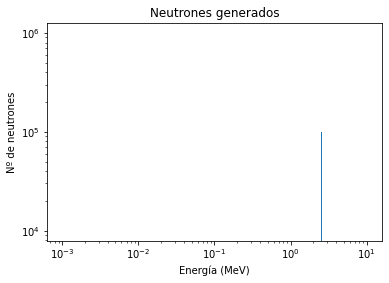

In [6]:
# Grafico de los neutrones generados [cant. neutrones/Energia]
plt.hist(np.array(creados)/1.e6,bins = 10 ** np.linspace(np.log10(0.001), np.log10(10), 200))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel("Energía (MeV)")
plt.ylabel('Nº de neutrones')
plt.title("Neutrones generados")
plt.show()

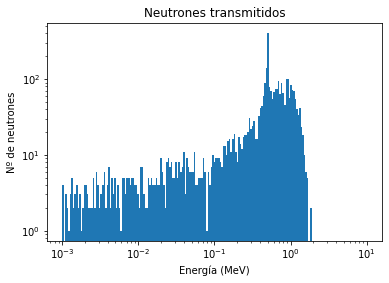

In [7]:
# Grafico de los neutrones transmitidos [cant. neutrones/Energia]
plt.hist(np.array(transmitidos)/1.e6,bins = 10 ** np.linspace(np.log10(0.001), np.log10(10), 200))
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.xlabel("Energía (MeV)")
plt.ylabel('Nº de neutrones')
plt.title("Neutrones transmitidos")
plt.show()

